In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('dataset/cleaned_us_accident_data.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
label_encoders = {}

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [8]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
df.head()

,id,source,severity,start_time,end_time,start_lat,start_lng,distance(mi),description,street,...,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight,start_hour,start_weekday,start_month,start_year,duration(min)
0,0,1,3,2,22,39.865147,-84.058723,0.01,2908202,205131,...,0,1,1,1,1,5.0,0.0,2.0,2016.0,314.0
1,1078596,1,2,4,1,39.928059,-82.831184,0.01,263240,153003,...,0,1,1,1,0,6.0,0.0,2.0,2016.0,30.0
2,2158876,1,2,6,2,39.063148,-84.032608,0.01,766536,282793,...,0,1,1,0,0,6.0,0.0,2.0,2016.0,30.0
3,3120197,1,3,8,3,39.747753,-84.205582,0.01,583792,205157,...,0,1,0,0,0,7.0,0.0,2.0,2016.0,30.0
4,3869792,1,2,9,4,39.627781,-84.188354,0.01,713313,224907,...,0,0,0,0,0,7.0,0.0,2.0,2016.0,30.0


In [11]:
X = df.drop('severity', axis=1)

In [12]:
y = df['severity']


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)
    return y_pred


In [24]:
lr_model = LogisticRegression(max_iter=1000)
lr_pred = evaluate_model(lr_model, "Logistic Regression")

📊 Logistic Regression Results:
Accuracy: 0.8032533559905631
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.01      0.02     12979
           2       0.83      0.94      0.88   1045855
           3       0.61      0.36      0.46    250648
           4       0.52      0.02      0.04     34607

    accuracy                           0.80   1344089
   macro avg       0.54      0.33      0.35   1344089
weighted avg       0.77      0.80      0.77   1344089

Confusion Matrix:
 [[   121  12411    445      2]
 [   495 987435  57411    514]
 [    22 159106  91402    118]
 [     0  32643   1278    686]]


In [25]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_pred = evaluate_model(rf_model, "Random Forest")

📊 Random Forest Results:
Accuracy: 0.9410887225473908
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.80      0.83     12979
           2       0.95      0.97      0.96   1045855
           3       0.90      0.86      0.88    250648
           4       0.81      0.61      0.69     34607

    accuracy                           0.94   1344089
   macro avg       0.88      0.81      0.84   1344089
weighted avg       0.94      0.94      0.94   1344089

Confusion Matrix:
 [[  10321    2232     422       4]
 [   1411 1018928   20931    4585]
 [    241   35522  214704     181]
 [     64   11067    2522   20954]]


In [26]:
xgb_encoder = LabelEncoder()
y_train_xgb = xgb_encoder.fit_transform(y_train)
y_test_xgb = xgb_encoder.transform(y_test)

In [27]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\anshm\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [21:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [28]:
y_pred_xgb_decoded = xgb_encoder.inverse_transform(y_pred_xgb)

In [ ]:
print("XGBoost Results:")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_decoded))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_decoded))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_decoded))

📊 XGBoost Results:
Accuracy: 0.9343838094054784
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.76      0.78     12979
           2       0.95      0.97      0.96   1045855
           3       0.88      0.83      0.85    250648
           4       0.95      0.60      0.74     34607

    accuracy                           0.93   1344089
   macro avg       0.90      0.79      0.83   1344089
weighted avg       0.93      0.93      0.93   1344089

Confusion Matrix:
 [[   9817    2786     376       0]
 [   1759 1018006   25468     622]
 [    414   42553  207289     392]
 [    131   11444    2249   20783]]


In [30]:
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [lr_pred, rf_pred, y_pred_xgb_decoded]

accuracies = []
conf_matrices = []
report_dfs = []

for name, y_pred in zip(model_names, predictions):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Save for plotting
    accuracies.append(acc)
    conf_matrices.append(cm)
    
    # Convert to DataFrame for plotting
    df = pd.DataFrame(report).T.drop(['accuracy', 'macro avg', 'weighted avg'])
    df['model'] = name
    report_dfs.append(df)


C:\Users\anshm\AppData\Local\Temp\ipykernel_25068\3104205967.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracies, palette="pastel")


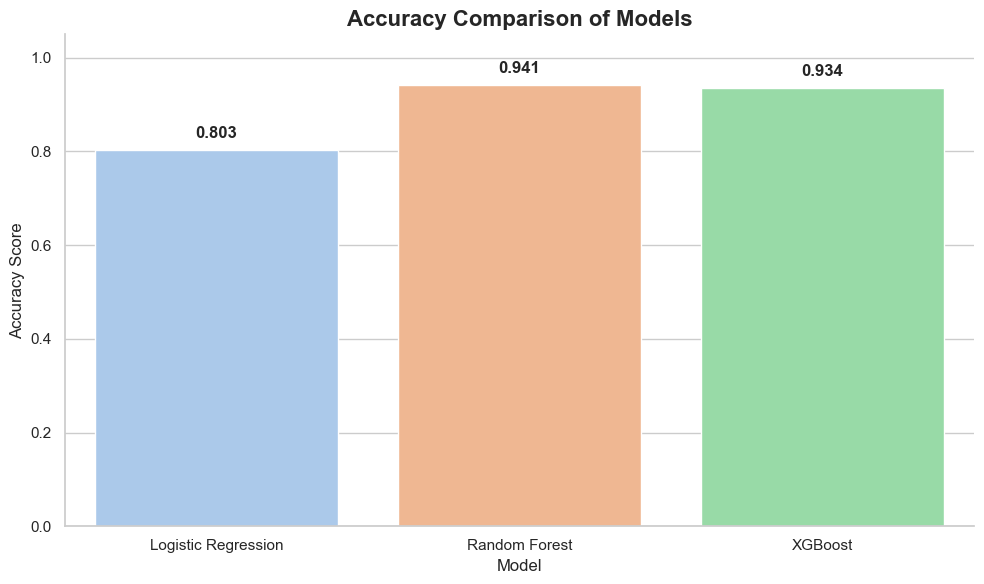

In [36]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x=model_names, y=accuracies, palette="pastel")

for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.02, f"{acc:.3f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 1.05)
plt.title("Accuracy Comparison of Models", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

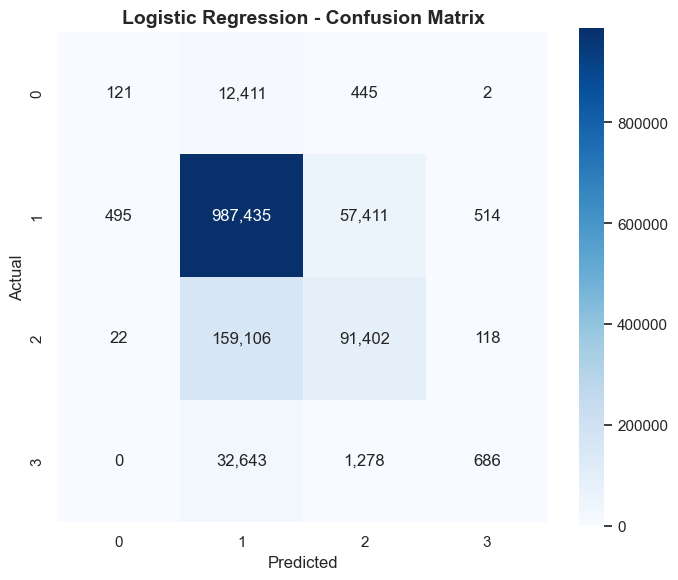

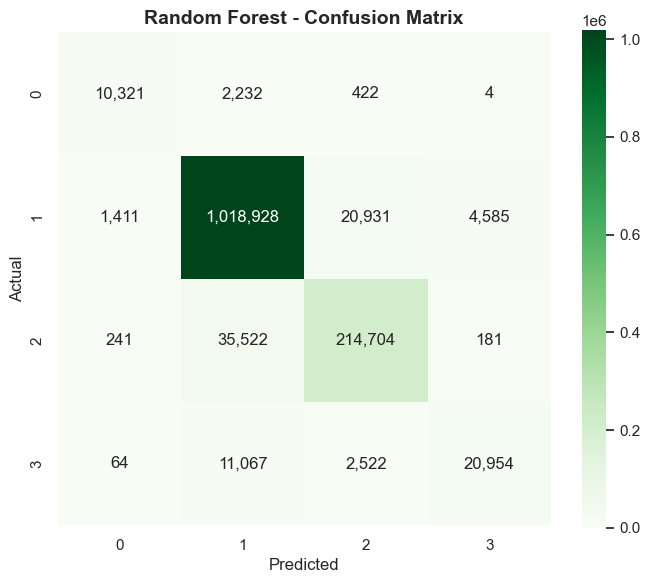

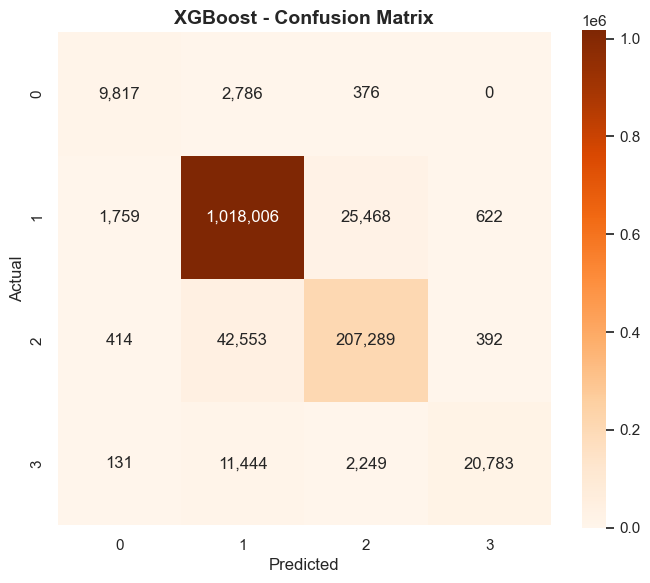

In [49]:
def plot_confusion_matrix(cm, model_name, cmap='Blues'):
    plt.figure(figsize=(7, 7), dpi=100)
    ax = sns.heatmap(
        cm,
        annot=True,
        fmt=',',
        cmap=cmap,
        cbar=True,
        square=True,
        vmin=0,
        vmax=cm.max(),
        annot_kws={"size": 12},
        cbar_kws={
            "shrink": 0.75,
            "aspect": 20 
        }
    )
    ax.set_title(f"{model_name} - Confusion Matrix", fontsize=14, fontweight='bold')
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)
    ax.tick_params(axis='both', labelsize=11)
    plt.tight_layout()
    plt.show()



colormaps = ["Blues", "Greens", "Oranges"]

for i in range(3):
    plot_confusion_matrix(conf_matrices[i], model_names[i], cmap=colormaps[i])


C:\Users\anshm\AppData\Local\Temp\ipykernel_25068\1758804818.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


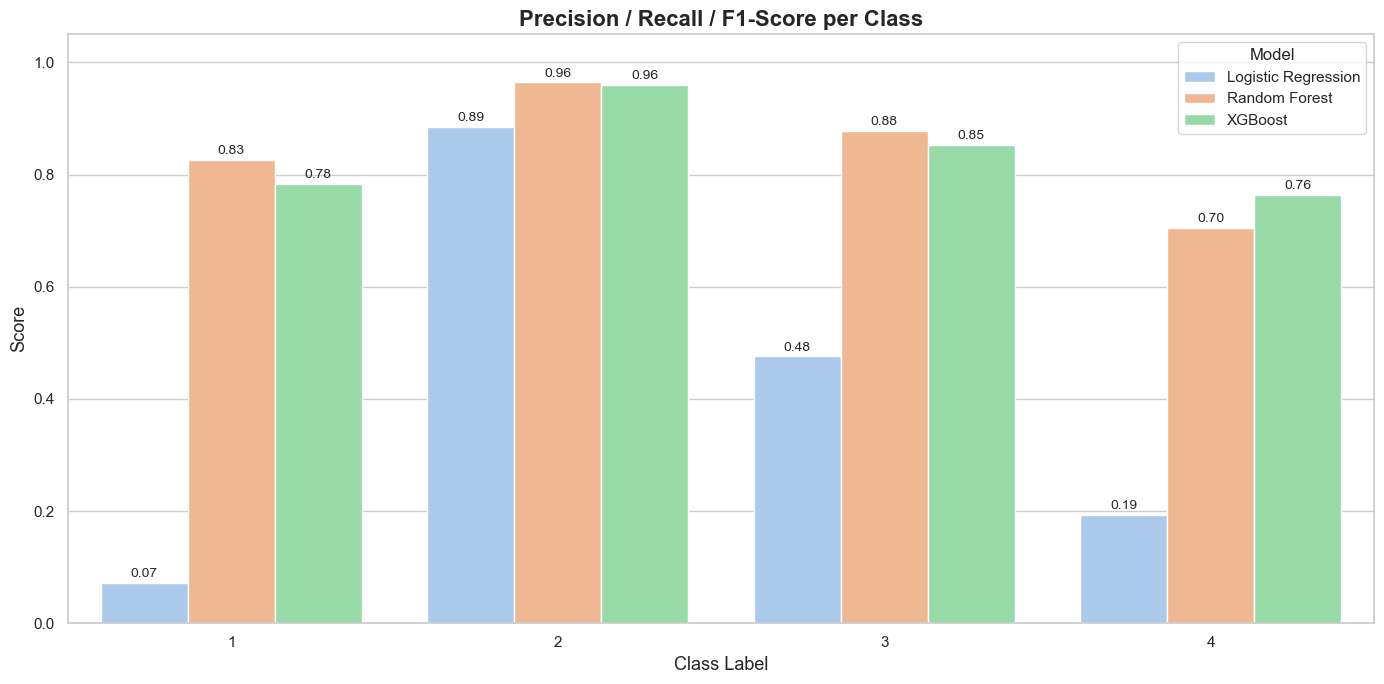

In [51]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=melted,
    x='class',
    y='value',
    hue='model',
    ci=None,
    palette='pastel',
    dodge=True
)

plt.title("Precision / Recall / F1-Score per Class", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=13)
plt.xlabel("Class Label", fontsize=13)

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, 1.05)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10, padding=2)

plt.legend(title="Model", fontsize=11, title_fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()
